<a href="https://colab.research.google.com/github/Pujithavege/MLProject/blob/main/DiabetesDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORTING LIBRARIES

In [ ]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

## LOADING DATASET

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/diabetes.csv')
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
data.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [ ]:
#Print the shape of dataset
data.shape

(768, 9)

In [ ]:
#Description of dataset
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
#To print data in transpose format
data.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [ ]:
#The dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Checking for missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#Checking for duplicates
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [ ]:
data[data.duplicated]

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

In [ ]:
#Checking NaN values
df=data.copy(deep=True)
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


## DATA VISUALIZATION

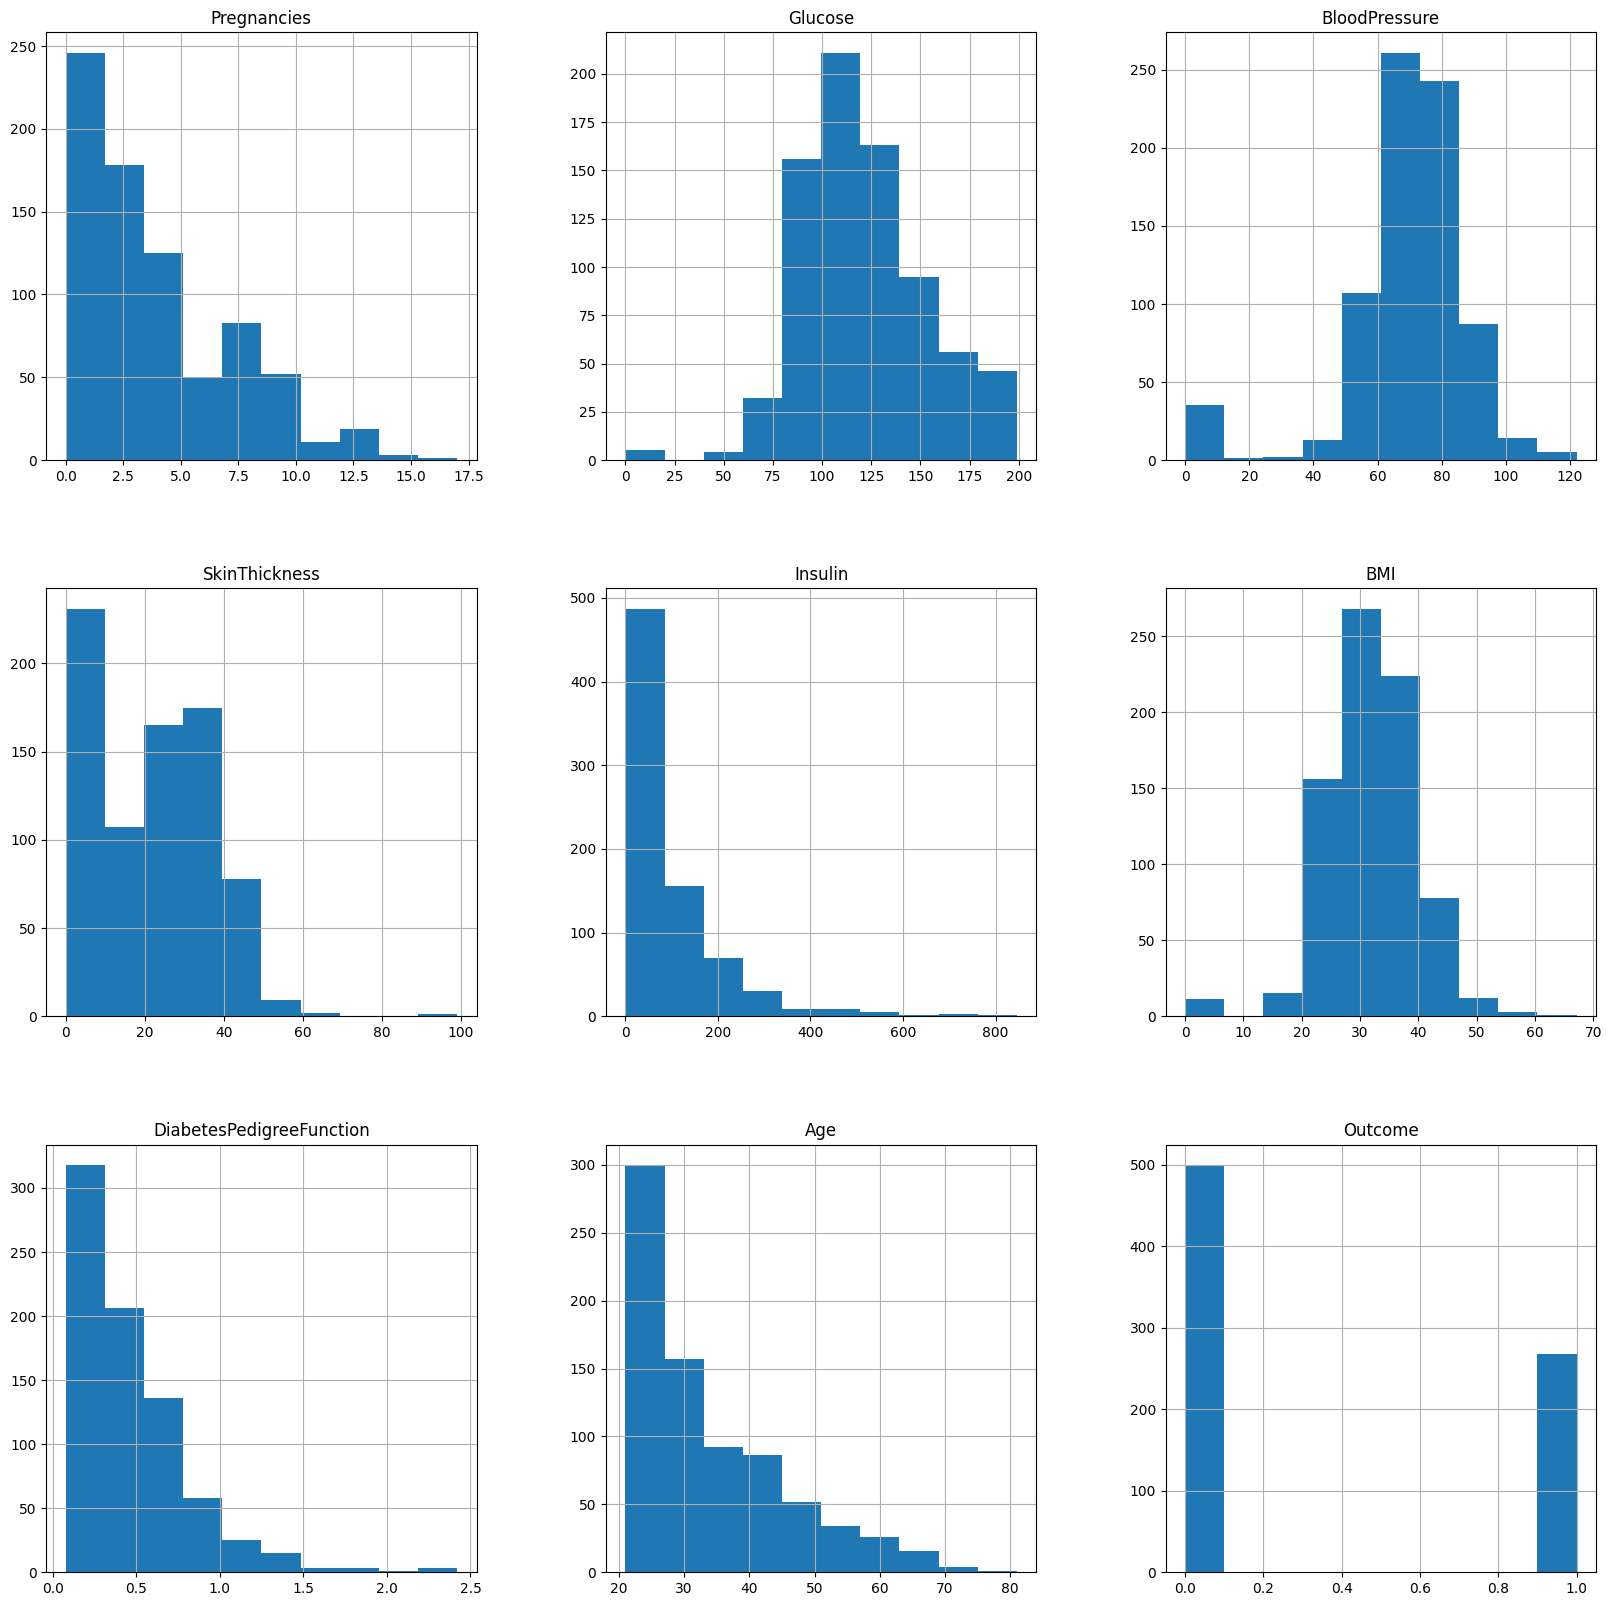

In [ ]:
#Plotting the data distribution plots
pl=data.hist(figsize=(20,20))

In [ ]:
#Imputing the NaN values
df['Glucose'].fillna(df['Glucose'].mean(),inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(),inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(),inplace=True)
df['Insulin'].fillna(df['Insulin'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].median(),inplace=True)

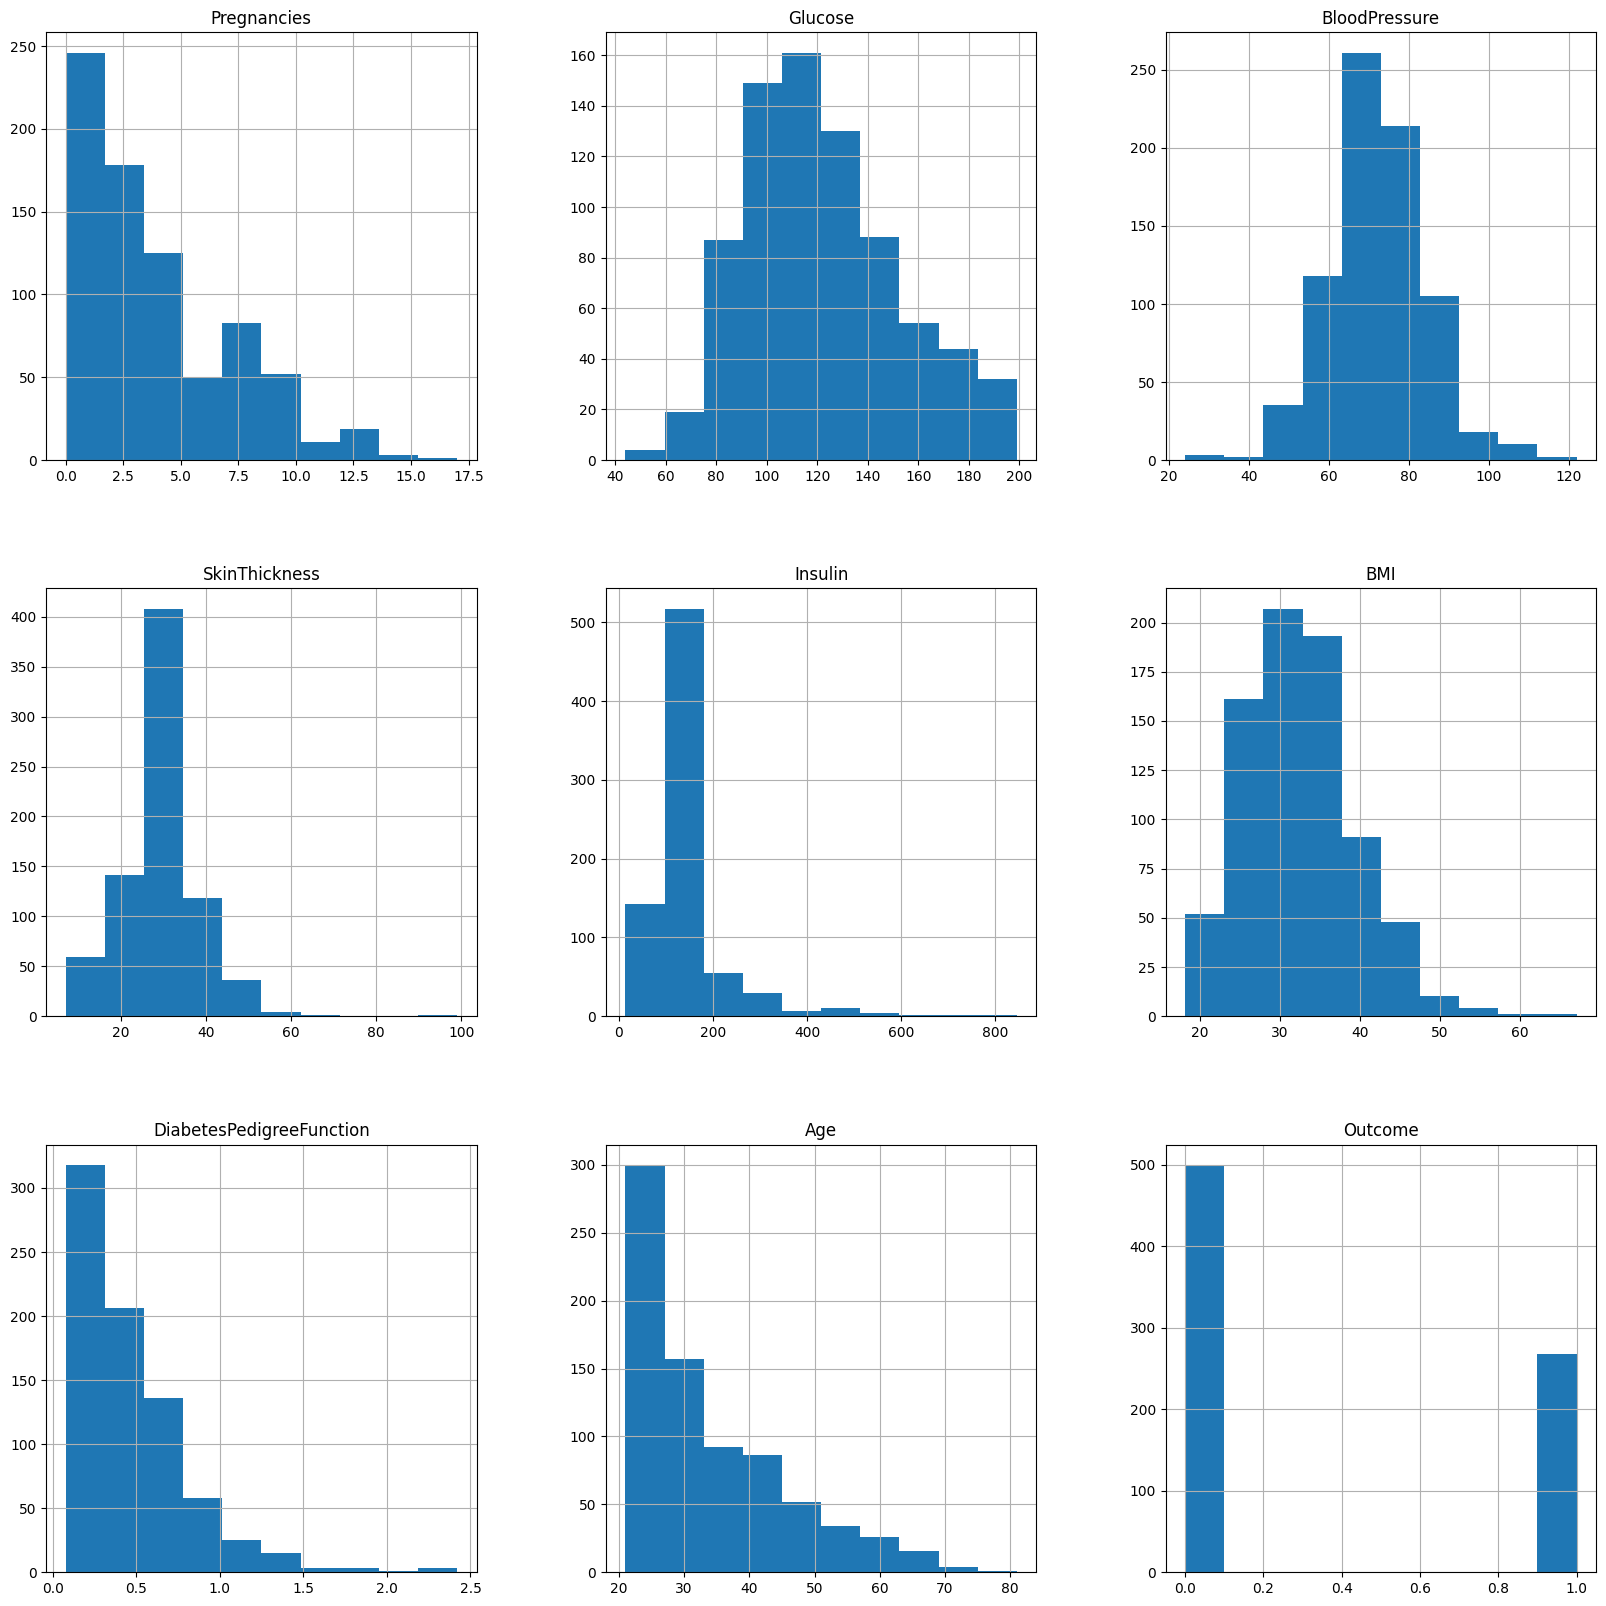

In [ ]:
pl=df.hist(figsize=(20,20))

0    500
1    268
Name: Outcome, dtype: int64


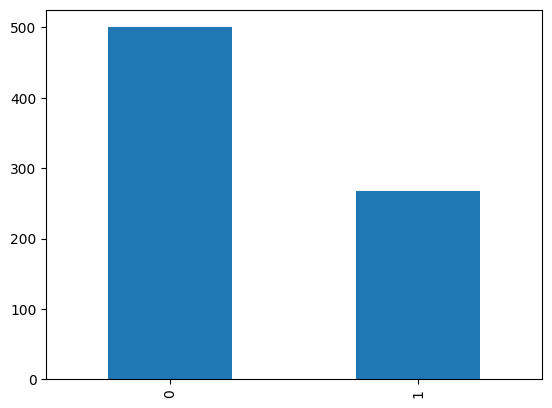

In [ ]:
#checking the balance of data by plotting the count of outcomes by their values
color_wheel={1:"#0392cf",2:"#7bc043"}
colors=data["Outcome"].map(lambda x:color_wheel.get(x+1))
print(data.Outcome.value_counts())
p=data.Outcome.value_counts().plot(kind="bar")

The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually.The number of non-diabetics is almost twice the number of diabetic patients.

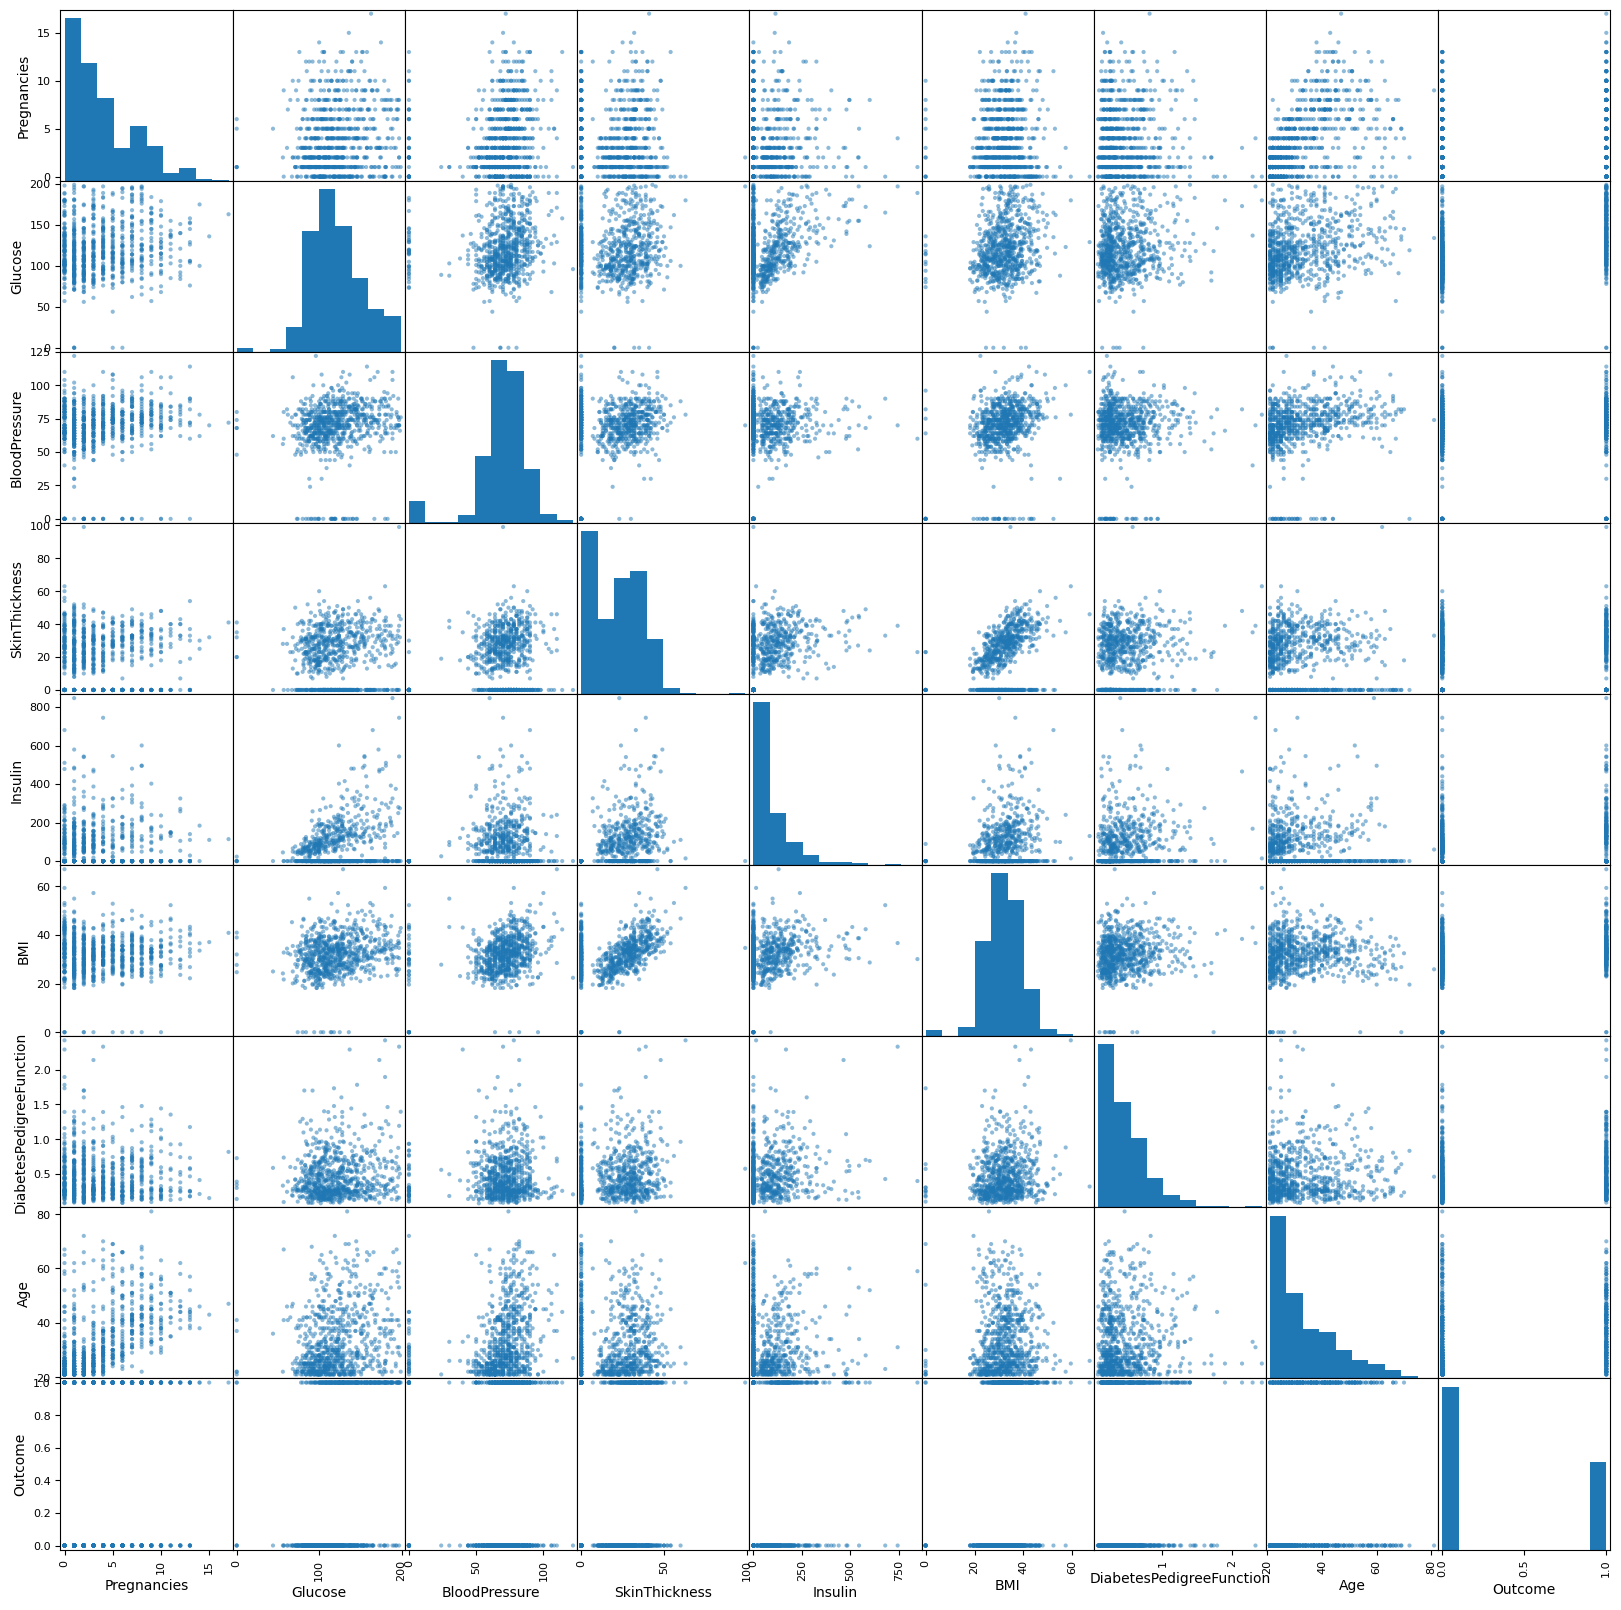

In [ ]:
#Plotting a scatter matrix of uncleaned data
from pandas.plotting import scatter_matrix
p=scatter_matrix(data,figsize=(20,20))

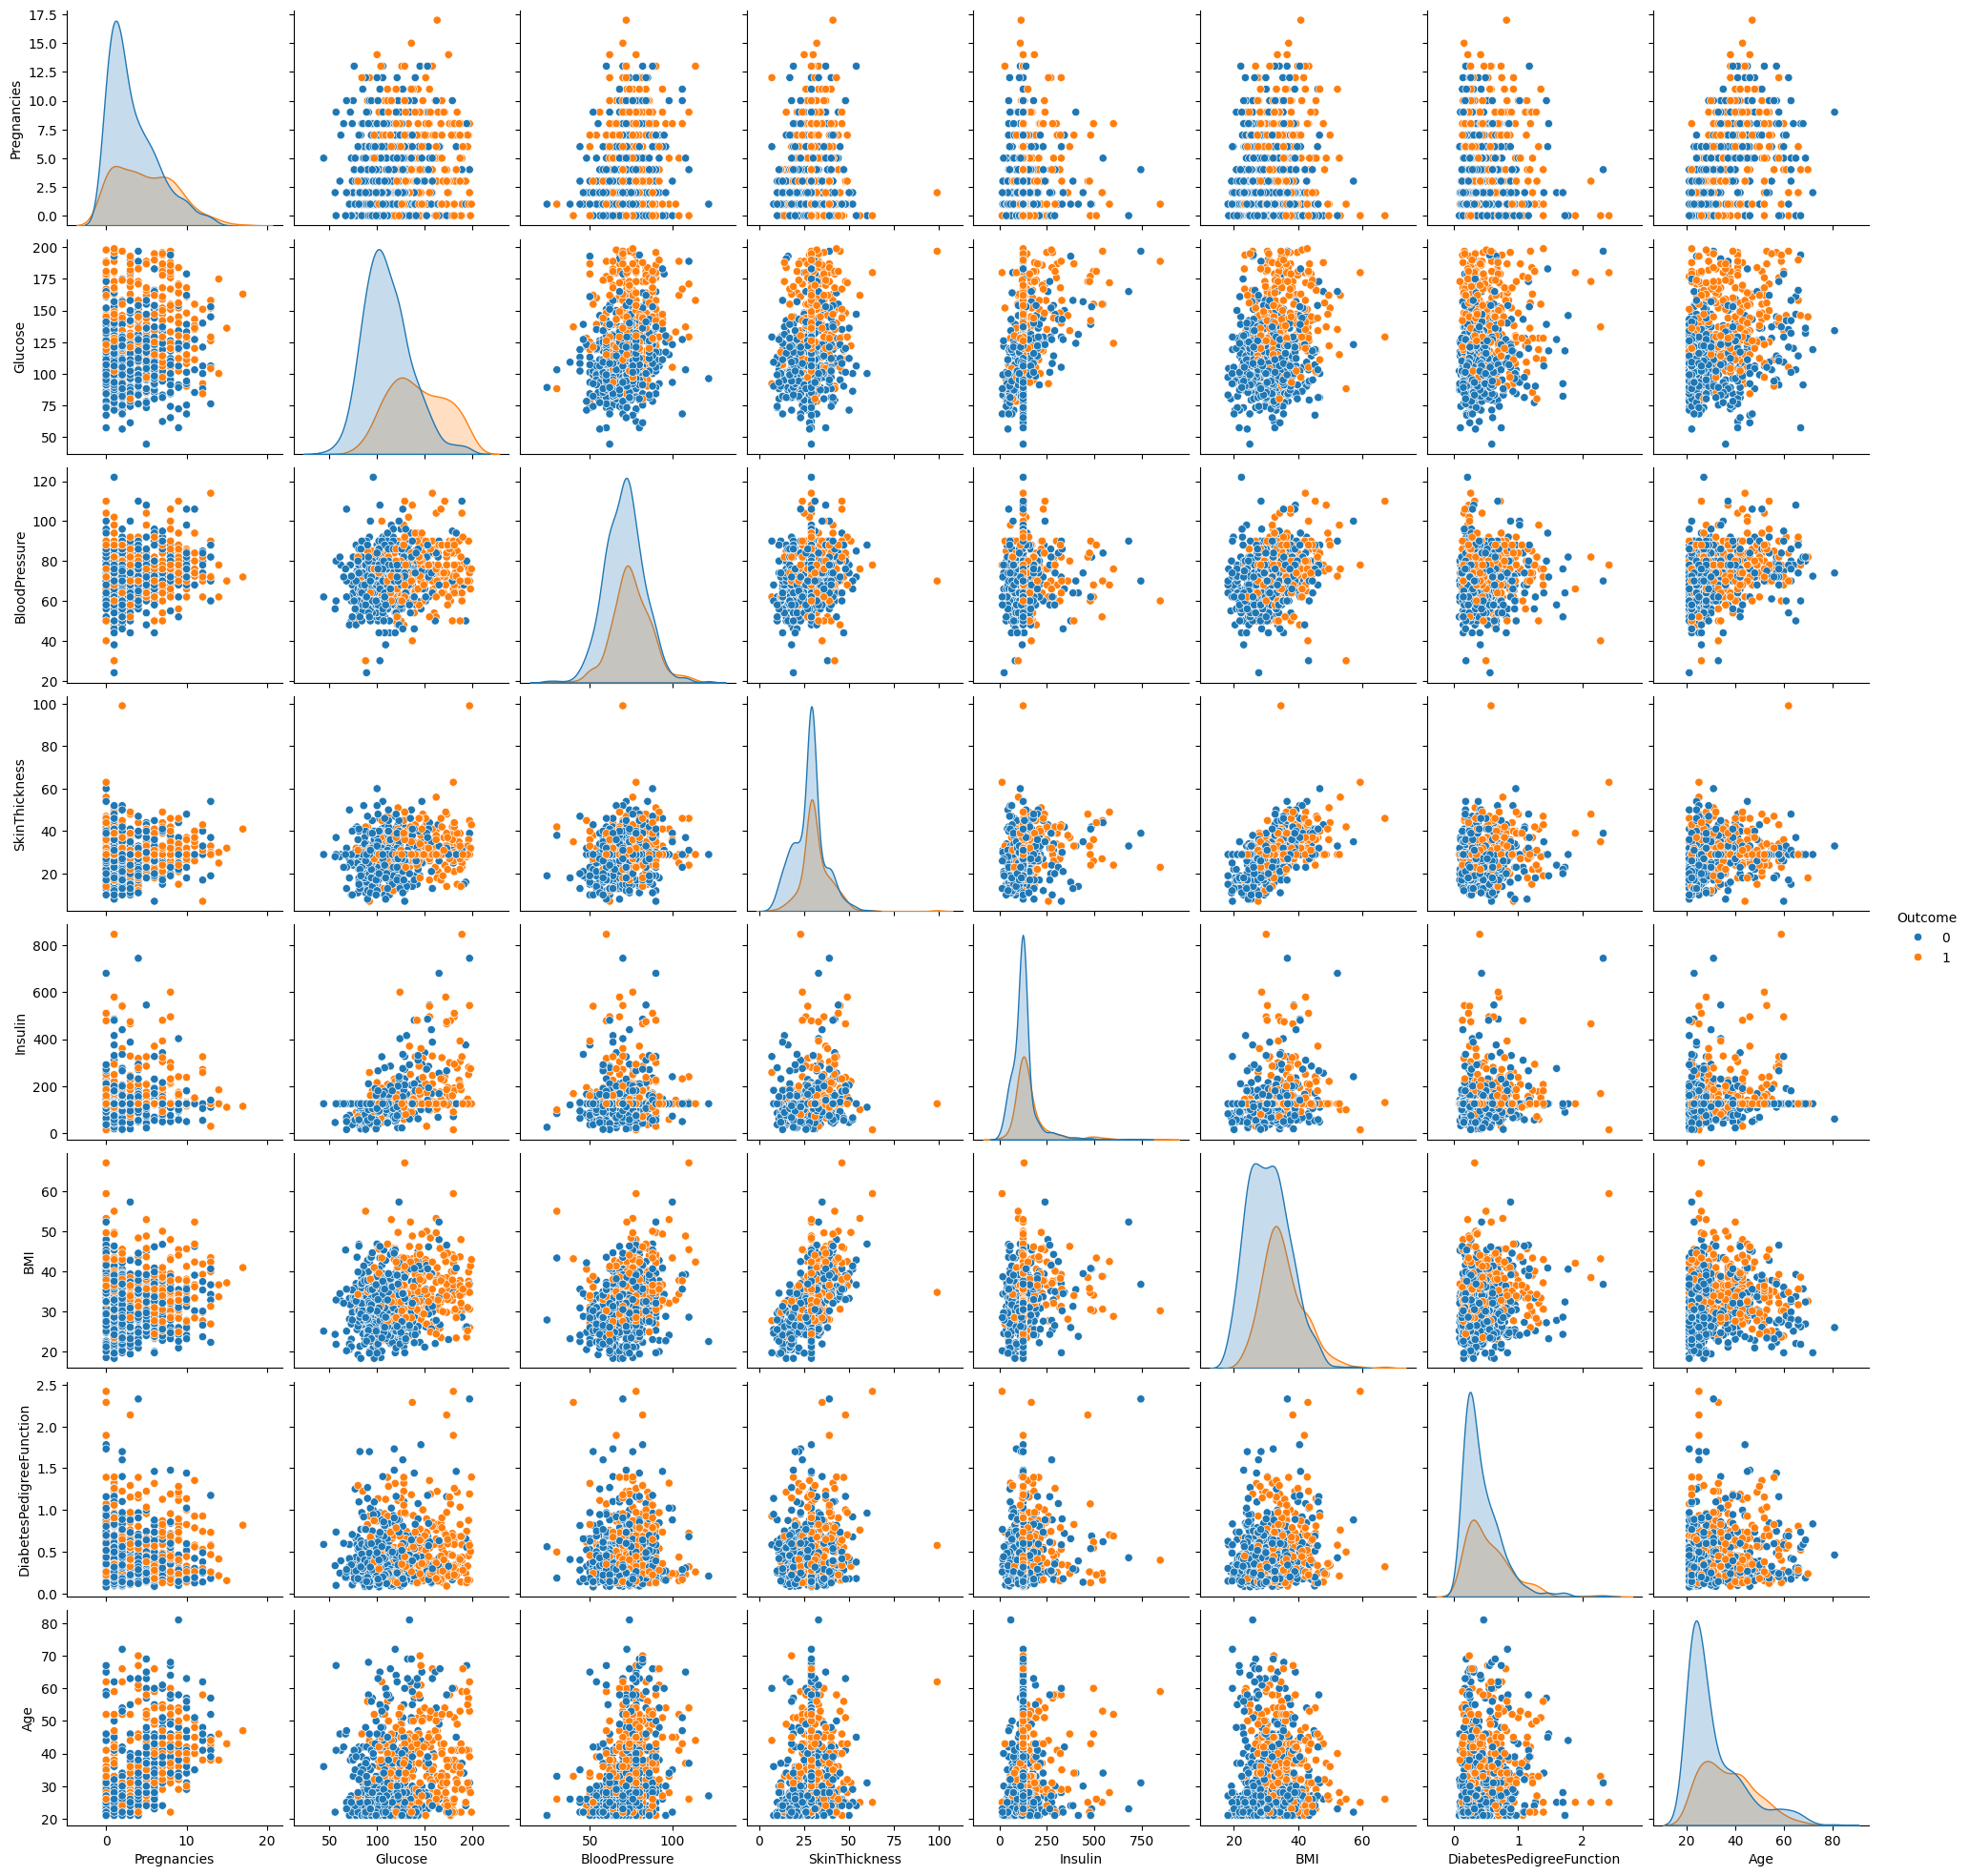

In [ ]:
sns.pairplot(df, hue='Outcome')
plt.show()

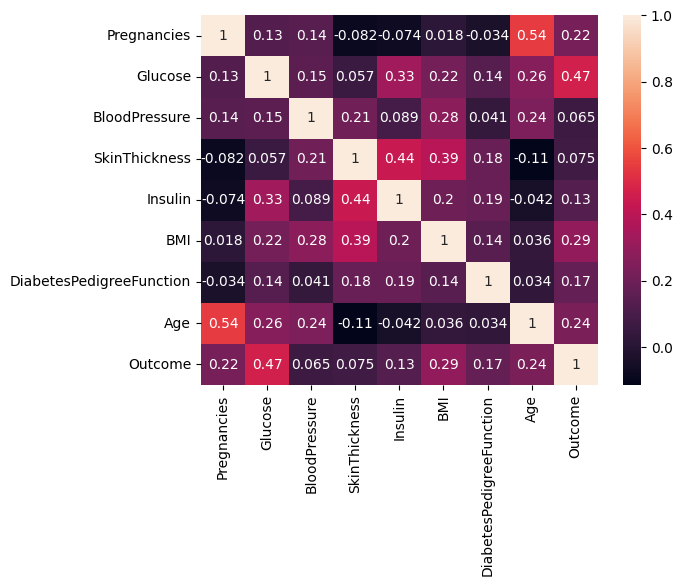

In [ ]:
#Correlation between features
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.show()

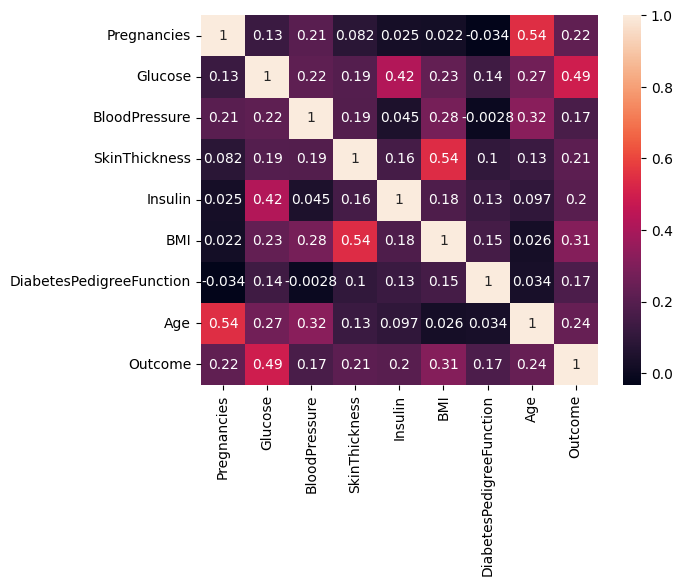

In [ ]:
#Correlation between features
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

## SCALING THE DATA

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X=pd.DataFrame(sc_x.fit_transform(df.drop(["Outcome"],axis=1),),columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.865108      -0.033518       0.670643 -0.181541  0.166619   
1    -0.844885 -1.206162      -0.529859      -0.012301 -0.181541 -0.852200   
2     1.233880  2.015813      -0.695306      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.074652      -0.529859      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.503458      -2.680669       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

In [ ]:
y=df.Outcome

In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## SPLITTING THE DATA INTO TRAIN AND TEST

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
60     -0.547919 -1.239039   1.175571e-15      -0.012301 -0.181541 -0.022590   
618     1.530847 -0.318475   7.937164e-01      -0.581421 -0.181541 -0.619327   
346    -0.844885  0.569212  -2.184328e+00      -1.150541 -0.668065 -0.546554   
294    -1.141852  1.292513  -1.853434e+00      -0.012301 -0.181541 -1.536264   
231     0.639947  0.404826   6.282695e-01       0.898290  2.656511  2.000494   
..           ...       ...            ...            ...       ...       ...   
71      0.342981  0.569212  -6.953060e-01       0.670643 -0.007783 -0.561109   
106    -0.844885 -0.844511   4.102655e+00      -0.012301 -0.181541 -1.463491   
270     1.827813 -0.680125   1.124610e+00       0.898290 -0.181541  1.913166   
435    -1.141852  0.634967   1.175571e-15      -0.012301 -0.181541  1.447421   
102    -1.141852  0.108930   1.951845e+00      -0.012301 -0.181541 -1.448937   

     DiabetesPedigreeFunction       Age  
60                  -0.507006 -1.041549  
618                  2.446670  1.425995  
346                  0.550035 -0.956462  
294                 -0.658012  2.702312  
231                 -0.706334  1.085644  
..                        ...       ...  
71                  -0.183854 -0.616111  
106                 -0.799958 -0.531023  
270                  2.005732  0.404942  
435                 -0.805998 -0.360847  
102                 -0.633851 -1.041549  

[614 rows x 8 columns]

## MODEL BUILDING

# NAIVE BAYES

In [ ]:
db=GaussianNB()
db.fit(X_train,y_train)

GaussianNB()

In [ ]:
y1_pred = db.predict(X_test)
print("Accuracy Score of Naive Baye's : ",accuracy_score(y_test,y1_pred)*100)

Accuracy Score of Naive Baye's :  75.32467532467533


Text(0.5, 3.722222222222216, 'Predicted Label')

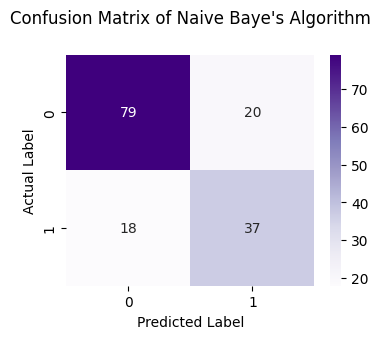

In [ ]:
cnf_matrix = confusion_matrix(y_test,y1_pred)
plt.figure(figsize=(4,3))
p = sns.heatmap((cnf_matrix),annot=True,cmap="Purples",fmt='g')
plt.title("Confusion Matrix of Naive Baye's Algorithm",y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [ ]:
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



# KNN ALGORITHM

In [ ]:
test_scores=[]
train_scores=[]
for i in range(1,15):
  knn=KNeighborsClassifier(i)
  knn.fit(X_train,y_train)
  train_scores.append(knn.score(X_train,y_train))
  test_scores.append(knn.score(X_test,y_test))

In [ ]:
train_scores

[1.0,
 0.8485342019543974,
 0.8436482084690554,
 0.8110749185667753,
 0.8273615635179153,
 0.8078175895765473,
 0.8143322475570033,
 0.8045602605863192,
 0.8110749185667753,
 0.8029315960912052,
 0.8029315960912052,
 0.7947882736156352,
 0.8094462540716613,
 0.7947882736156352]

In [ ]:
test_scores

[0.6623376623376623,
 0.6558441558441559,
 0.6948051948051948,
 0.7207792207792207,
 0.7337662337662337,
 0.7142857142857143,
 0.7012987012987013,
 0.7337662337662337,
 0.7272727272727273,
 0.7597402597402597,
 0.7597402597402597,
 0.7727272727272727,
 0.7597402597402597,
 0.7727272727272727]

In [ ]:
max_train_score = max(train_scores)
train_scores_ind = [i for i,v in enumerate(train_scores) if v==max_train_score]
print("Max train score = ",max_train_score*100," and k = ",list(map(lambda x:x+1,train_scores_ind)))

Max train score =  100.0  and k =  [1]


In [ ]:
max_test_score = max(test_scores)
test_scores_ind = [i for i,v in enumerate(test_scores) if v==max_test_score]
print("Max test score = ",max_test_score*100," and k = ",list(map(lambda x:x+1,test_scores_ind)))

Max test score =  77.27272727272727  and k =  [12, 14]


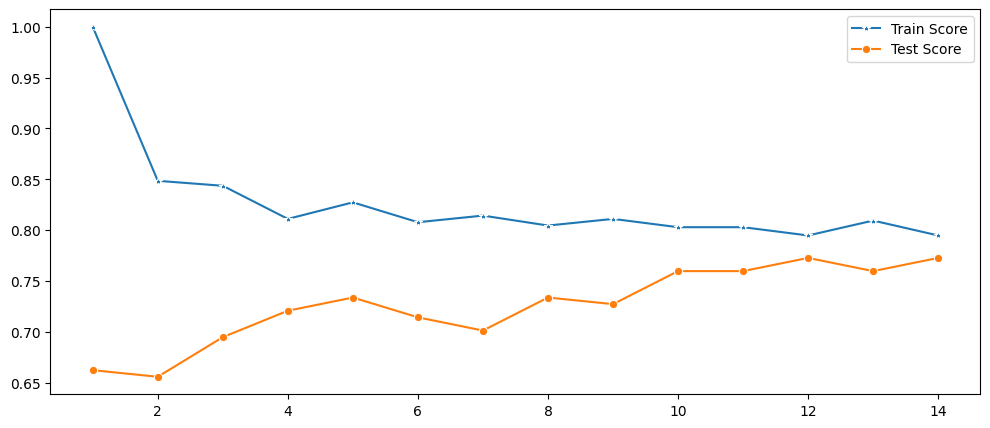

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,15), y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(1,15), y=test_scores,marker='o',label='Test Score')
plt.show()

In [ ]:
knn=KNeighborsClassifier(12)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7727272727272727

Text(0.5, 3.722222222222216, 'Predicted Label')

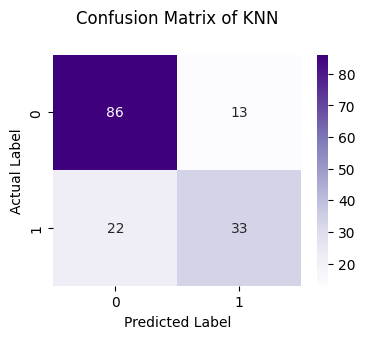

In [ ]:
y_pred = knn.predict(X_test)
cnf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4,3))
p = sns.heatmap((cnf_matrix),annot=True,cmap="Purples",fmt='g')
plt.title("Confusion Matrix of KNN",y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [ ]:
print("Accuracy Score of KNN : ",accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))

Accuracy Score of KNN :  77.27272727272727
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.72      0.60      0.65        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



# Linear Discriminant Analysis

In [ ]:
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [ ]:
y2_pred=lda.predict(X_test)
print("Accuracy Score of LDA : ",accuracy_score(y_test,y2_pred)*100)

Accuracy Score of LDA :  76.62337662337663


Text(0.5, 3.722222222222216, 'Predicted Label')

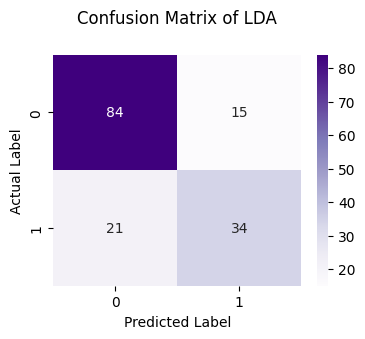

In [ ]:
cnf_matrix = confusion_matrix(y_test,y2_pred)
plt.figure(figsize=(4,3))
p = sns.heatmap((cnf_matrix),annot=True,cmap="Purples",fmt='g')
plt.title("Confusion Matrix of LDA",y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [ ]:
print(classification_report(y_test,y2_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        99
           1       0.69      0.62      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



# LOGISTIC REGRESSION

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y3_pred=lr.predict(X_test)
print("Accuracy Score of LR: ",accuracy_score(y_test,y3_pred)*100)

Accuracy Score of LR:  75.32467532467533


Text(0.5, 3.722222222222216, 'Predicted Label')

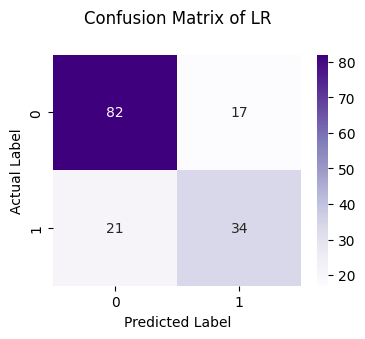

In [ ]:
cnf_matrix = confusion_matrix(y_test,y3_pred)
plt.figure(figsize=(4,3))
p = sns.heatmap((cnf_matrix),annot=True,cmap="Purples",fmt='g')
plt.title("Confusion Matrix of LR",y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [ ]:
print(classification_report(y_test,y3_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



DECISION TREE CLASSIFIER

In [ ]:
# Initialize & train decision tree model
clf = DecisionTreeClassifier(criterion="entropy")
#Id3 algorithm uses entropy
clf.fit(X,y)
#Print the textual representation of the decision tree
tree_rules = export_text(clf,feature_names=list(X.columns))
print(tree_rules)

|--- Glucose <= 0.19
|   |--- BMI <= -0.87
|   |   |--- Insulin <= -1.07
|   |   |   |--- Insulin <= -1.09
|   |   |   |   |--- class: 0
|   |   |   |--- Insulin >  -1.09
|   |   |   |   |--- class: 1
|   |   |--- Insulin >  -1.07
|   |   |   |--- class: 0
|   |--- BMI >  -0.87
|   |   |--- Age <= -0.40
|   |   |   |--- SkinThickness <= -0.07
|   |   |   |   |--- BMI <= 0.05
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- BMI >  0.05
|   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.98
|   |   |   |   |   |   |--- Insulin <= -1.10
|   |   |   |   |   |   |   |--- DiabetesPedigreeFunction <= -0.90
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- DiabetesPedigreeFunction >  -0.90
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Insulin >  -1.10
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- DiabetesPedigreeFunction >  0.98
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- SkinThickness >  -0.07
|

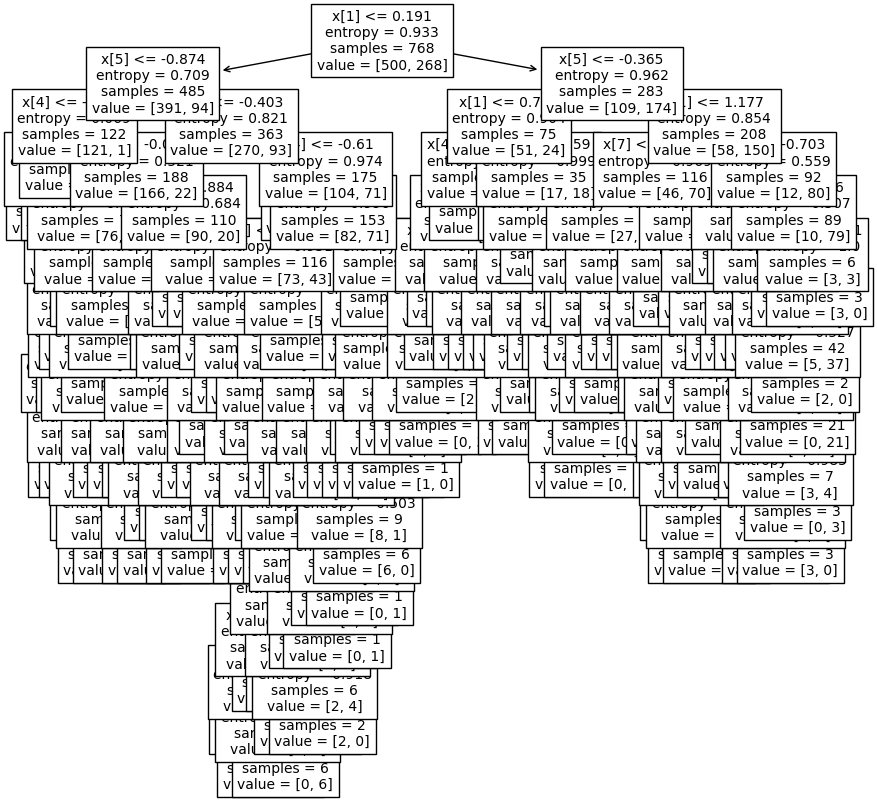

In [ ]:
#Generate & print the textual representation of the decision tree
fig,ax = plt.subplots(figsize=(10,10))
tree.plot_tree(clf,fontsize=10)
plt.show()

In [ ]:
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y4_pred=classifier.predict(X_test)
print("Accuracy Score of CART : ",accuracy_score(y_test,y4_pred)*100)

Accuracy Score of CART :  70.12987012987013


Text(0.5, 3.722222222222216, 'Predicted Label')

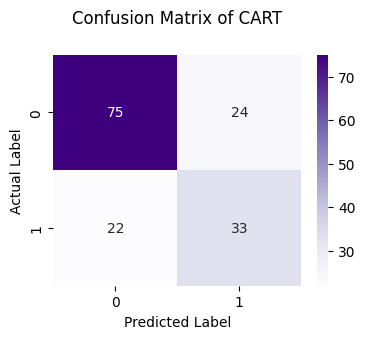

In [ ]:
cnf_matrix = confusion_matrix(y_test,y4_pred)
plt.figure(figsize=(4,3))
p = sns.heatmap((cnf_matrix),annot=True,cmap="Purples",fmt='g')
plt.title("Confusion Matrix of CART",y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [ ]:
print(classification_report(y_test,y4_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77        99
           1       0.58      0.60      0.59        55

    accuracy                           0.70       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.70      0.70      0.70       154



ID3 ESTIMATOR

In [ ]:
# Assuming clf is  trained decision tree model and X is feature matrix
dot_data = export_graphviz(clf, feature_names=X.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
# Save the graph as a png file
graph.render("decision_tree", format='png', cleanup=True)

'decision_tree.png'

In [ ]:
# Create an instance of the DecisionTreeClassifier with criterion set to 'entropy' for ID3
estimator = DecisionTreeClassifier(criterion='entropy')
# Fit the training data into the estimator and train the model
estimator.fit(X_train, y_train)
# Test the estimator using independent features and get the predicted values
y5_pred = estimator.predict(X_test)

# Print the accuracy score of the actual and predicted values
print("Accuracy Score of ID3:", accuracy_score(y_test, y5_pred) * 100)

Accuracy Score of ID3: 72.07792207792207


Text(0.5, 3.722222222222216, 'Predicted Label')

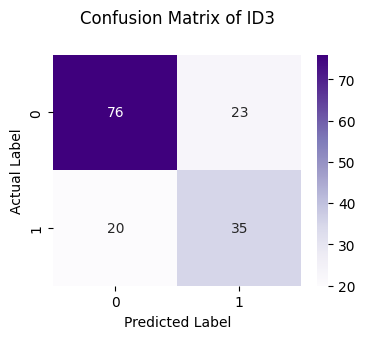

In [ ]:
cnf_matrix = confusion_matrix(y_test,y5_pred)
plt.figure(figsize=(4,3))
p = sns.heatmap((cnf_matrix),annot=True,cmap="Purples",fmt='g')
plt.title("Confusion Matrix of ID3",y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [ ]:
print(classification_report(y_test,y5_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



# RANDOM FOREST CLASSIFIER

In [ ]:
rf=RandomForestClassifier()

In [ ]:
# Parameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = { 'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], }
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=10)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [ ]:
# Best parameters for Random Forest
best_params_for_rf = grid_search_rf.best_params_
print(best_params_for_rf)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
# Fitting Random Forest with the best parameters
model = RandomForestClassifier(**best_params_for_rf, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
y6_pred = model.predict(X_test)
print("Accuracy Score of Ensemble : ",accuracy_score(y_test, y6_pred) * 100)

Accuracy Score of Ensemble :  75.97402597402598


Text(0.5, 3.722222222222216, 'Predicted Label')

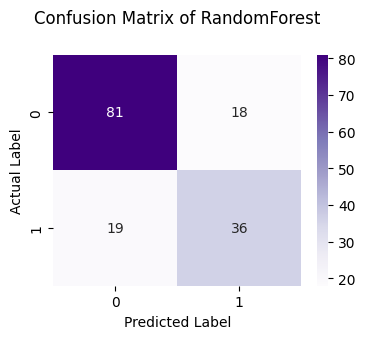

In [ ]:
cnf_matrix = confusion_matrix(y_test,y6_pred)
plt.figure(figsize=(4,3))
p = sns.heatmap((cnf_matrix),annot=True,cmap="Purples",fmt='g')
plt.title("Confusion Matrix of RandomForest",y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [ ]:
print(classification_report(y_test,y6_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [ ]:
# Training, test scores and margin of error of the models
pd.DataFrame({ 'Model': ['NB','LDA','LR','CART','KNN', 'Random Forest'], 'Training Score': [db.score(X_train, y_train),lda.score(X_train, y_train),lr.score(X_train, y_train),clf.score(X_train, y_train),knn.score(X_train, y_train),  model.score(X_train, y_train)], 'Test Score': [accuracy_score(y_test, y1_pred),accuracy_score(y_test, y2_pred),accuracy_score(y_test, y3_pred),accuracy_score(y_test, y4_pred),accuracy_score(y_test, y_pred), accuracy_score(y_test, y6_pred)], 'Error': [db.score(X_train, y_train) - accuracy_score(y_test, y1_pred),lda.score(X_train, y_train) - accuracy_score(y_test, y2_pred),lr.score(X_train, y_train) - accuracy_score(y_test, y3_pred),clf.score(X_train, y_train) - accuracy_score(y_test, y4_pred),knn.score(X_train, y_train) - accuracy_score(y_test, y_pred), model.score(X_train, y_train) - accuracy_score(y_test, y6_pred)] })

Model  Training Score  Test Score     Error
0             NB        0.749186    0.753247 -0.004061
1            LDA        0.770358    0.766234  0.004125
2             LR        0.771987    0.753247  0.018740
3           CART        1.000000    0.701299  0.298701
4            KNN        0.794788    0.772727  0.022061
5  Random Forest        1.000000    0.759740  0.240260

Conclusion


When the training scores, test scores and error margins of the trained models are compared, it is seen that KNN is the model that gives the best results with a training score of 0.794788, a test score of 0.772727 and an error margin of 0.022061. On the other hand, the lowest success rate appears to belong to the CART model among the positive error rates.

# MAKING A PREDICTIVE SYSTEM

In [ ]:
input_data=(4,110,92,0,0,37.6,0.191,30)
#changing input data to numpy
input=np.asarray(input_data)
#reshape the arrray as we are predicting for one instance
input_reshape=input.reshape(1,-1)
#standardised the data
input_std=sc_x.transform(input_reshape)
print(input_std)
predicts=knn.predict(input_std)
print(predicts)
if(predicts[0]==0):
  print("The person is not diabetic")
else:
  print("The person is diabetic")

[[ 0.04601433 -0.38422915  1.62095107 -3.31319642 -1.62952723  0.74880175
  -0.84827977 -0.27575966]]
[0]
The person is not diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:

input_data=(8,183,64,0,0,23.3,0.672,32)
#changing input data to numpy
input=np.asarray(input_data)
#reshape the arrray as we are predicting for one instance
input_reshape=input.reshape(1,-1)
#standardised the data
input_std=sc_x.transform(input_reshape)
print(input_std)
predicts=knn.predict(input_std)
print(predicts)
if(predicts[0]==0):
  print("The person is not diabetic")
else:
  print("The person is diabetic")

[[ 1.23388019  2.0158134  -0.69530596 -3.31319642 -1.62952723 -1.33250021
   0.60439732 -0.10558415]]
[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
